In [4]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet

import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('StudentsPerformance.csv')

In [6]:
X=df.drop('math score',axis=1)
y=df['math score']
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [7]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', oh_transformer, cat_features)])
X_scaled=preprocessor.fit_transform(X)

In [8]:
X_scaled

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [9]:
X.shape

(1000, 7)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(800, 19)

In [12]:
X_test.shape


(200, 19)

In [13]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    r2=r2_score(true,predicted)
    return mae,mse,r2



In [14]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "SVR":SVR()
    
}

In [15]:
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)

    mae,mse,r2=evaluate_model(y_train,y_train_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("TRAINING SET")
    print("The model of {} has a r2 score of {} ".format(list(models.keys())[i],r2))
    print("The model of {} has a mae of {} ".format(list(models.keys())[i],mae))
    print("The model of {} has a mse of {} ".format(list(models.keys())[i],mse))
    
    y_test_pred=model.predict(X_test)
    print("\n")
    mae,mse,r2=evaluate_model(y_test,y_test_pred)
    print("TEST SET")
    print("The model of {} has a r2 score of {} ".format(list(models.keys())[i],r2))
    print("The model of {} has a mae of {} ".format(list(models.keys())[i],mae))
    print("The model of {} has a mse of {} ".format(list(models.keys())[i],mse))

    print("\n")
    print("\n")
    r2_list.append(r2)
    

Linear Regression
TRAINING SET
The model of Linear Regression has a r2 score of 0.8743172040139593 
The model of Linear Regression has a mae of 4.266711846071956 
The model of Linear Regression has a mse of 28.33487038064859 


TEST SET
The model of Linear Regression has a r2 score of 0.8804332983749565 
The model of Linear Regression has a mae of 4.214763142474849 
The model of Linear Regression has a mse of 29.095169866715466 




Lasso
TRAINING SET
The model of Lasso has a r2 score of 0.8071466723085148 
The model of Lasso has a mae of 5.206296077972952 
The model of Lasso has a mse of 43.47829788272618 


TEST SET
The model of Lasso has a r2 score of 0.825320079562973 
The model of Lasso has a mae of 5.157879138921816 
The model of Lasso has a mse of 42.50633235127344 




Ridge
TRAINING SET
The model of Ridge has a r2 score of 0.8743042615212909 
The model of Ridge has a mae of 4.264987823725981 
The model of Ridge has a mse of 28.337788233082442 


TEST SET
The model of Ridge has

In [16]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
linear=LinearRegression(fit_intercept=True)
linear=linear.fit(X_train,y_train)
y_pred=linear.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Linear Regression R2 Score: ",score)



Linear Regression R2 Score:  88.04332983749565


Text(0.5, 0, 'Models')

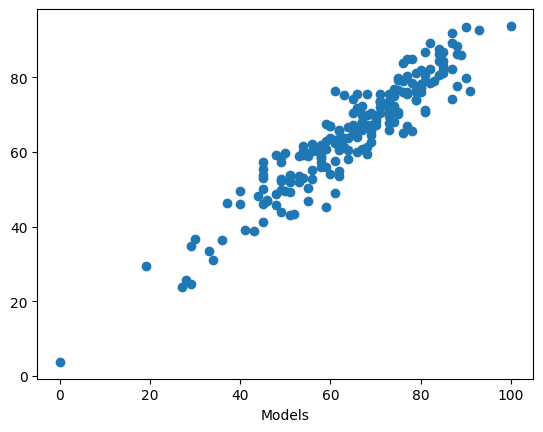

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('Models')

<Axes: xlabel='math score'>

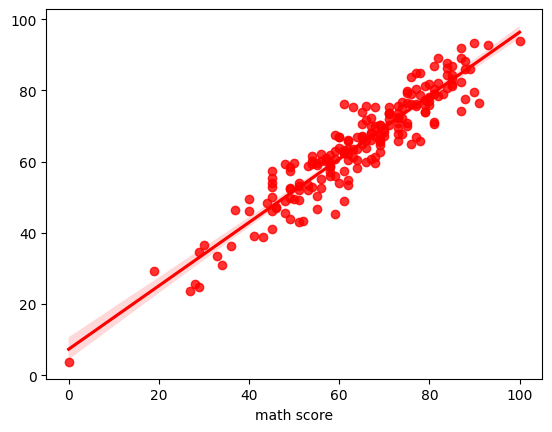

In [18]:
sns.regplot(x=y_test,y=y_pred,color='red')